In [1]:
! pip install flair
! pip install fuzzywuzzy

In [2]:
#Connect to our own Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd "/content/gdrive/My Drive/ProjetNLPQuora/"
!ls

/content/gdrive/My Drive/ProjetNLPQuora
 bert-master  'test (1).csv'   test.csv   train.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780

train_question1 is 24.7% complete.
train_question1 is 49.5% complete.
train_question1 is 74.2% complete.
train_question1 is 98.9% complete.
train_question2 is 24.7% complete.
train_question2 is 49.5% complete.
train_question2 is 74.2% complete.
train_question2 is 98.9% complete.
What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?

What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?

what step step guid invest share market india
what step step guid invest share market

what stori kohinoor koh noor diamond
what would happen indian govern stole kohinoor koh noor diamond back



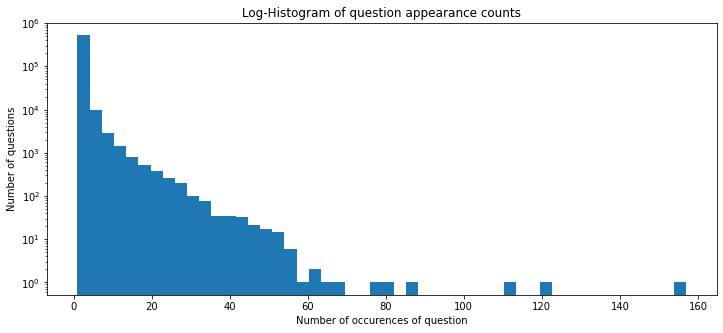

In [4]:

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
import re
from string import punctuation
import matplotlib.pyplot as plt


df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")



print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()


#stop_words = ['the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then',
#              'just','so','than','such','both','through','about','for','is','of','while','during','to','What','Which',
#              'Is','If','While','This']

def text_to_wordlist(text, remove_stop_words=True, lemmatize=True,stem_words=True):
    # Clean the text, with the option to remove stop_words lemmatize and to stem words.
    
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", str(text))

    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    stopWords = set(stopwords.words('english'))
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stopWords]
        text = " ".join(text)
        
        
    #Optionally, Lemmatize words
    lemmatizer = WordNetLemmatizer() 
    if lemmatize:
        text = text.split()
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    
    # Return a list of words
    return(text)


def process_questions(question_list, questions, question_list_name, dataframe):
    '''transform questions and display progress'''
    for question in questions:
        question_list.append(text_to_wordlist(question))
        if len(question_list) % 100000 == 0:
            progress = len(question_list)/len(dataframe) * 100
            print("{} is {}% complete.".format(question_list_name, round(progress, 1)))


train_question1 = []
process_questions(train_question1, df_train.question1, 'train_question1', df_train)

train_question2 = []
process_questions(train_question2, df_train.question2, 'train_question2', df_train)


a = 0 
for i in range(a,a+2):
    print(df_train.question1[i])
    print(df_train.question2[i])
    print()

a = 0 
for i in range(a,a+2):
    print(train_question1[i])
    print(train_question2[i])
    print()

In [0]:
df_train_clean = df_train
df_train_clean['question1'] = train_question1
df_train_clean['question2'] = train_question2

In [6]:
import torch
from flair.data import Sentence
from flair.models import SequenceTagger
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentPoolEmbeddings, Sentence , StackedEmbeddings
from flair.models import TextClassifier
from langdetect import detect
import pandas as pd
#from googletrans import Translator
import pandas as pd
import re
import numpy as np
from numpy import linalg as LA
import spacy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from datetime import date
from datetime import datetime,timedelta

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [0]:
df_test = df_train_clean

In [0]:
df_test = df_test.iloc[:200]

In [0]:
nlp = spacy.load("en_core_web_sm",disable=['parser','ner'])

def Vectorization(df,text_column_name,idx): 
    stacked_embedding = [FlairEmbeddings("news-forward-fast"),FlairEmbeddings("news-backward-fast"),WordEmbeddings("glove")]
    df['Vector'+str(idx)]=df[text_column_name].apply(Document_Embedding_Flair,embedding=stacked_embedding)
    return df

def Vectorization2(q1,q2): 
    stacked_embedding = [FlairEmbeddings("news-forward-fast"),FlairEmbeddings("news-backward-fast"),WordEmbeddings("glove")]
    v1 = Document_Embedding_Flair(q1,stacked_embedding)
    v2 = Document_Embedding_Flair(q2,stacked_embedding)
    return [v1,v2]

def Document_Embedding_Flair(text,embedding):
    sentence = Sentence(text)
    document_embeddings = DocumentPoolEmbeddings(embedding)
    document_embeddings.embed(sentence)
    return sentence.get_embedding()

def Similarity(x,y):
  sim = []
  for i in range(x.shape[0]):
    if (type(x[i])==torch.Tensor):
        #xi=x[i].detach().numpy()
        #yi=y[i].detach().numpy()
        xi=x[i].cuda().detach().cpu().clone().numpy()
        yi=y[i].cuda().detach().cpu().clone().numpy()
        xi=np.asarray(xi)
        yi=np.asarray(yi)
        sim.append(np.dot(xi,yi)/(LA.norm(xi)*LA.norm(yi)))
  return sim



In [0]:
import time

In [19]:
t1 = time.time()
Vectorization(df_test,'question1',1)
Vectorization(df_test,'question2',2)
print(time.time()-t1)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


20.061625719070435


In [0]:
 torch.cuda.empty_cache()

In [44]:
v1 = df_test['Vector1']
v2 = df_test['Vector2']
sim = Similarity(v1,v2)
len(sim)

200

In [42]:
treshold = .98
sim = np.asarray(sim)
sim_bool = (sim >= treshold)*1
print(sum(df_test['is_duplicate']== sim_bool)/200)

0.655


In [0]:
th = []
sim = np.asarray(sim)
for i in range(20):
  t = .8 + 0.01*i
  sim_bool = (sim >= t)*1
  th.append(sum(df_test['is_duplicate']== sim_bool)/200)

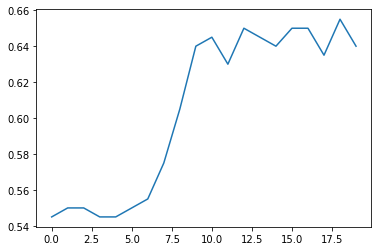

In [47]:
from matplotlib import pyplot as plt
plt.plot(th)

In [0]:
def compute_score(batchsize, df, treshold):
    v1 = []
    v2 = []
    for j in range(500 // batchsize ): #df_train.shape[0]
      print("{} over {}, {}% complete.".format(j*batchsize, df_train.shape[0], j*batchsize/df_train.shape[0]))
      df_test = df_train_clean[j*batchsize : (j+1)*batchsize]
      Vectorization(df_test,'question1',1)
      Vectorization(df_test,'question2',2)
      v1.append(df_test['Vector1']) 
      v2.append(df_test['Vector2'])
          totalscore = []
      print(df_test)
      #score = Similarity(v1,v2)
      #score = np.asarray(score)
      #score = (score >= treshold)*1
      score = 1
      totalscore.append(score)
          df['similarity'] = totalscore


In [0]:
compute_score(50,df_test,0.85)